In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Data exploring


In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
submission = df_test["Id"]
pd.set_option("max_columns",None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.shape

(1460, 81)

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [7]:
df["MSSubClass"]=df["MSSubClass"].astype(str)
df_test["MSSubClass"]=df_test["MSSubClass"].astype(str)
df.drop("Id",axis=1,inplace=True)
df_test.drop("Id",axis=1,inplace=True)

In [8]:
df.corr().unstack().sort_values(ascending=False).drop_duplicates()[:24]

LotFrontage   LotFrontage     1.000000
GarageArea    GarageCars      0.882475
YearBuilt     GarageYrBlt     0.825667
TotRmsAbvGrd  GrLivArea       0.825489
TotalBsmtSF   1stFlrSF        0.819530
SalePrice     OverallQual     0.790982
              GrLivArea       0.708624
2ndFlrSF      GrLivArea       0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BsmtFullBath  BsmtFinSF1      0.649212
YearRemodAdd  GarageYrBlt     0.642277
GarageCars    SalePrice       0.640409
FullBath      GrLivArea       0.630012
SalePrice     GarageArea      0.623431
TotRmsAbvGrd  2ndFlrSF        0.616423
TotalBsmtSF   SalePrice       0.613581
2ndFlrSF      HalfBath        0.609707
SalePrice     1stFlrSF        0.605852
OverallQual   GarageCars      0.600671
              GrLivArea       0.593007
YearBuilt     YearRemodAdd    0.592855
GarageYrBlt   GarageCars      0.588920
OverallQual   YearBuilt       0.572323
GrLivArea     1stFlrSF        0.566024
dtype: float64

In [9]:
df.corrwith(df["SalePrice"]).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

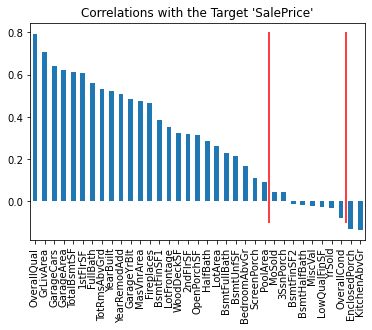

In [10]:
df.corrwith(df["SalePrice"]).sort_values(ascending=False)[1:].plot(kind="bar")
plt.vlines(24.5, -0.1, 0.8, colors='red')
plt.vlines(32.5, -0.1, 0.8, colors='red')
plt.title("Correlations with the Target 'SalePrice'");
plt.show()

# Data preprocessing

In [11]:
# removing columns with low correlation with sales price range(0.1- -0.1)
col = ["MoSold"         ,
"3SsnPorch"       ,
"BsmtFinSF2"      ,
"BsmtHalfBath"   ,
"MiscVal"         ,

"LowQualFinSF"    ,
"YrSold"  ,
"OverallCond"
]

In [12]:
for col_name in col:
    df.drop(col_name,axis=1,inplace=True)
    df_test.drop(col_name,axis=1,inplace=True)

In [13]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,NaN,NaN,NaN,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,NaN,NaN,NaN,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,NaN,NaN,NaN,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,NaN,NaN,NaN,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,NaN,NaN,NaN,WD,Normal,250000


# DATA PRERPOCESSING

In [14]:
df_combined = pd.concat([df,df_test])
df_combined.shape

(2919, 72)

In [15]:
null_count = pd.DataFrame(df_combined.isnull().sum())
for x in null_count.index:
    if null_count.loc[x][0]>1400:
        df_combined.drop(x,axis=1,inplace=True)

In [16]:
X=df_combined.iloc[:,:-1]
Y = df.iloc[:,-1]


In [17]:
num_features = X.select_dtypes(include='number').columns
num_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('scaler',MinMaxScaler())])
cat_features = X.select_dtypes(include='object').columns
cat_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OrdinalEncoder())])

In [18]:
preprocessor = ColumnTransformer([("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features),], 
    remainder='drop')

In [19]:
X_prepared = pd.DataFrame(preprocessor.fit_transform(X))

In [20]:
x_train_prepared = X_prepared.iloc[:1460,:]
x_test_prepared = X_prepared.iloc[1460:,:]

In [21]:
Y_log= np.log(Y)


# MODEL

In [22]:
model_name=["LinearRegression","RandomForestRegressor","XGBRegressor","DecisionTreeRegressor","Ridge","Lasso"]
model_acc=[]

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_train_prepared,Y_log,test_size=0.15)
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_squared_error as mse
model_acc.append(np.sqrt(mse(Y_test,lr.predict(X_test))))

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1)
rf.fit(X_train,Y_train)
model_acc.append(np.sqrt(mse(Y_test,rf.predict(X_test))))

In [26]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train,Y_train)
model_acc.append(np.sqrt(mse(Y_test,xgbr.predict(X_test))))

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train,Y_train)
model_acc.append(np.sqrt(mse(Y_test,dtr.predict(X_test))))

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,Y_train)
model_acc.append(np.sqrt(mse(Y_test,ridge.predict(X_test))))

In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,Y_train)
model_acc.append(np.sqrt(mse(Y_test,lasso.predict(X_test))))

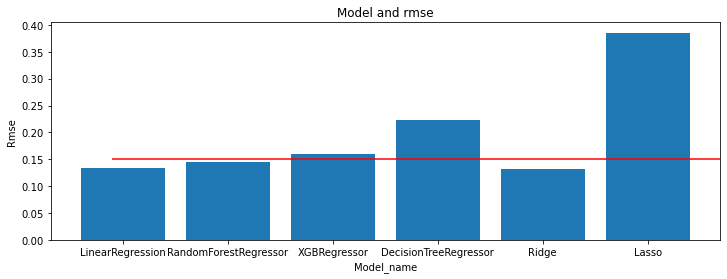

In [30]:
plt.figure(figsize=(12,4))
plt.hlines(0.15,-0.1,8,colors="red")
plt.bar(model_name,model_acc)
plt.xlabel("Model_name")
plt.ylabel("Rmse")
plt.title("Model and rmse")
plt.show()

# # Tunning RIDGE HyperParameters

In [31]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
gscv = GridSearchCV(ridge,{"alpha":[0,0.1,0.3,0.5,0.6]},cv=10,scoring="neg_mean_absolute_error",n_jobs=-1)

In [32]:
result=gscv.fit(x_train_prepared,Y_log)

In [33]:
result.best_score_

-0.10032380767789392

In [34]:
result.best_params_

{'alpha': 0.3}

In [35]:
ridge = Ridge(alpha=0.3)
ridge.fit(x_train_prepared,Y_log)
y_pred = ridge.predict(pd.DataFrame(x_test_prepared))
y_pred = np.exp(y_pred)
#submission.drop("SalePrice",axis=1,inplace=True)
#submission=submission["Id"]
submission=pd.concat([submission,pd.DataFrame(y_pred)],axis=1)
submission.columns=["Id","SalePrice"]
submission["SalePrice"] = np.round(submission["SalePrice"],0)

submission.to_csv("submission20June.csv",index=False)

In [36]:
submission

,Id,SalePrice
0,1461,116176.0
1,1462,152257.0
2,1463,172127.0
3,1464,192305.0
4,1465,195871.0
...,...,...
1454,2915,87519.0
1455,2916,93365.0
1456,2917,163520.0
1457,2918,122020.0


# Kaggle accuracy = 0.14854